# Performance of LeNet-5

In [1]:
% matplotlib inline

import os
import matplotlib.pyplot as plt

from scripts.utils import ExpResults

In [2]:
plotproperties = {'font.size': 13,
                  'axes.titlesize': 'xx-large',
                  'axes.labelsize': 'xx-large',
                  'xtick.labelsize': 'xx-large',
                  'xtick.major.size': 7,
                  'xtick.minor.size': 5,
                  'ytick.labelsize': 'xx-large',
                  'ytick.major.size': 7,
                  'ytick.minor.size': 5,
                  'legend.fontsize': 'x-large',
                  'figure.figsize': (7, 6),
                  'savefig.dpi': 300,
                  'savefig.format': 'pdf'}

import matplotlib as mpl
mpl.rcParams.update(plotproperties)

## Parameters and definitions

In [3]:
log_dir = '/home/rbodo/.snntoolbox/data/cifar10/alexnet/log/gui'
runlabel_dyn_thresh_no_norm = '02'
runlabel_dyn_thresh_norm = '09'
path_dyn_thresh_no_norm = os.path.join(log_dir, runlabel_dyn_thresh_no_norm)
path_dyn_thresh_norm = os.path.join(log_dir, runlabel_dyn_thresh_norm)


In [4]:
exp_dyn_thresh_no_norm = ExpResults(path_dyn_thresh_no_norm, 'TTFS dyn thresh no norm', 'o', 'b')
exp_dyn_thresh_norm = ExpResults(path_dyn_thresh_norm, 'TTFS dyn thresh norm', 'v', 'red')
experiments = [exp_dyn_thresh_no_norm, exp_dyn_thresh_norm]

Using Theano backend.


## Plot error vs operations

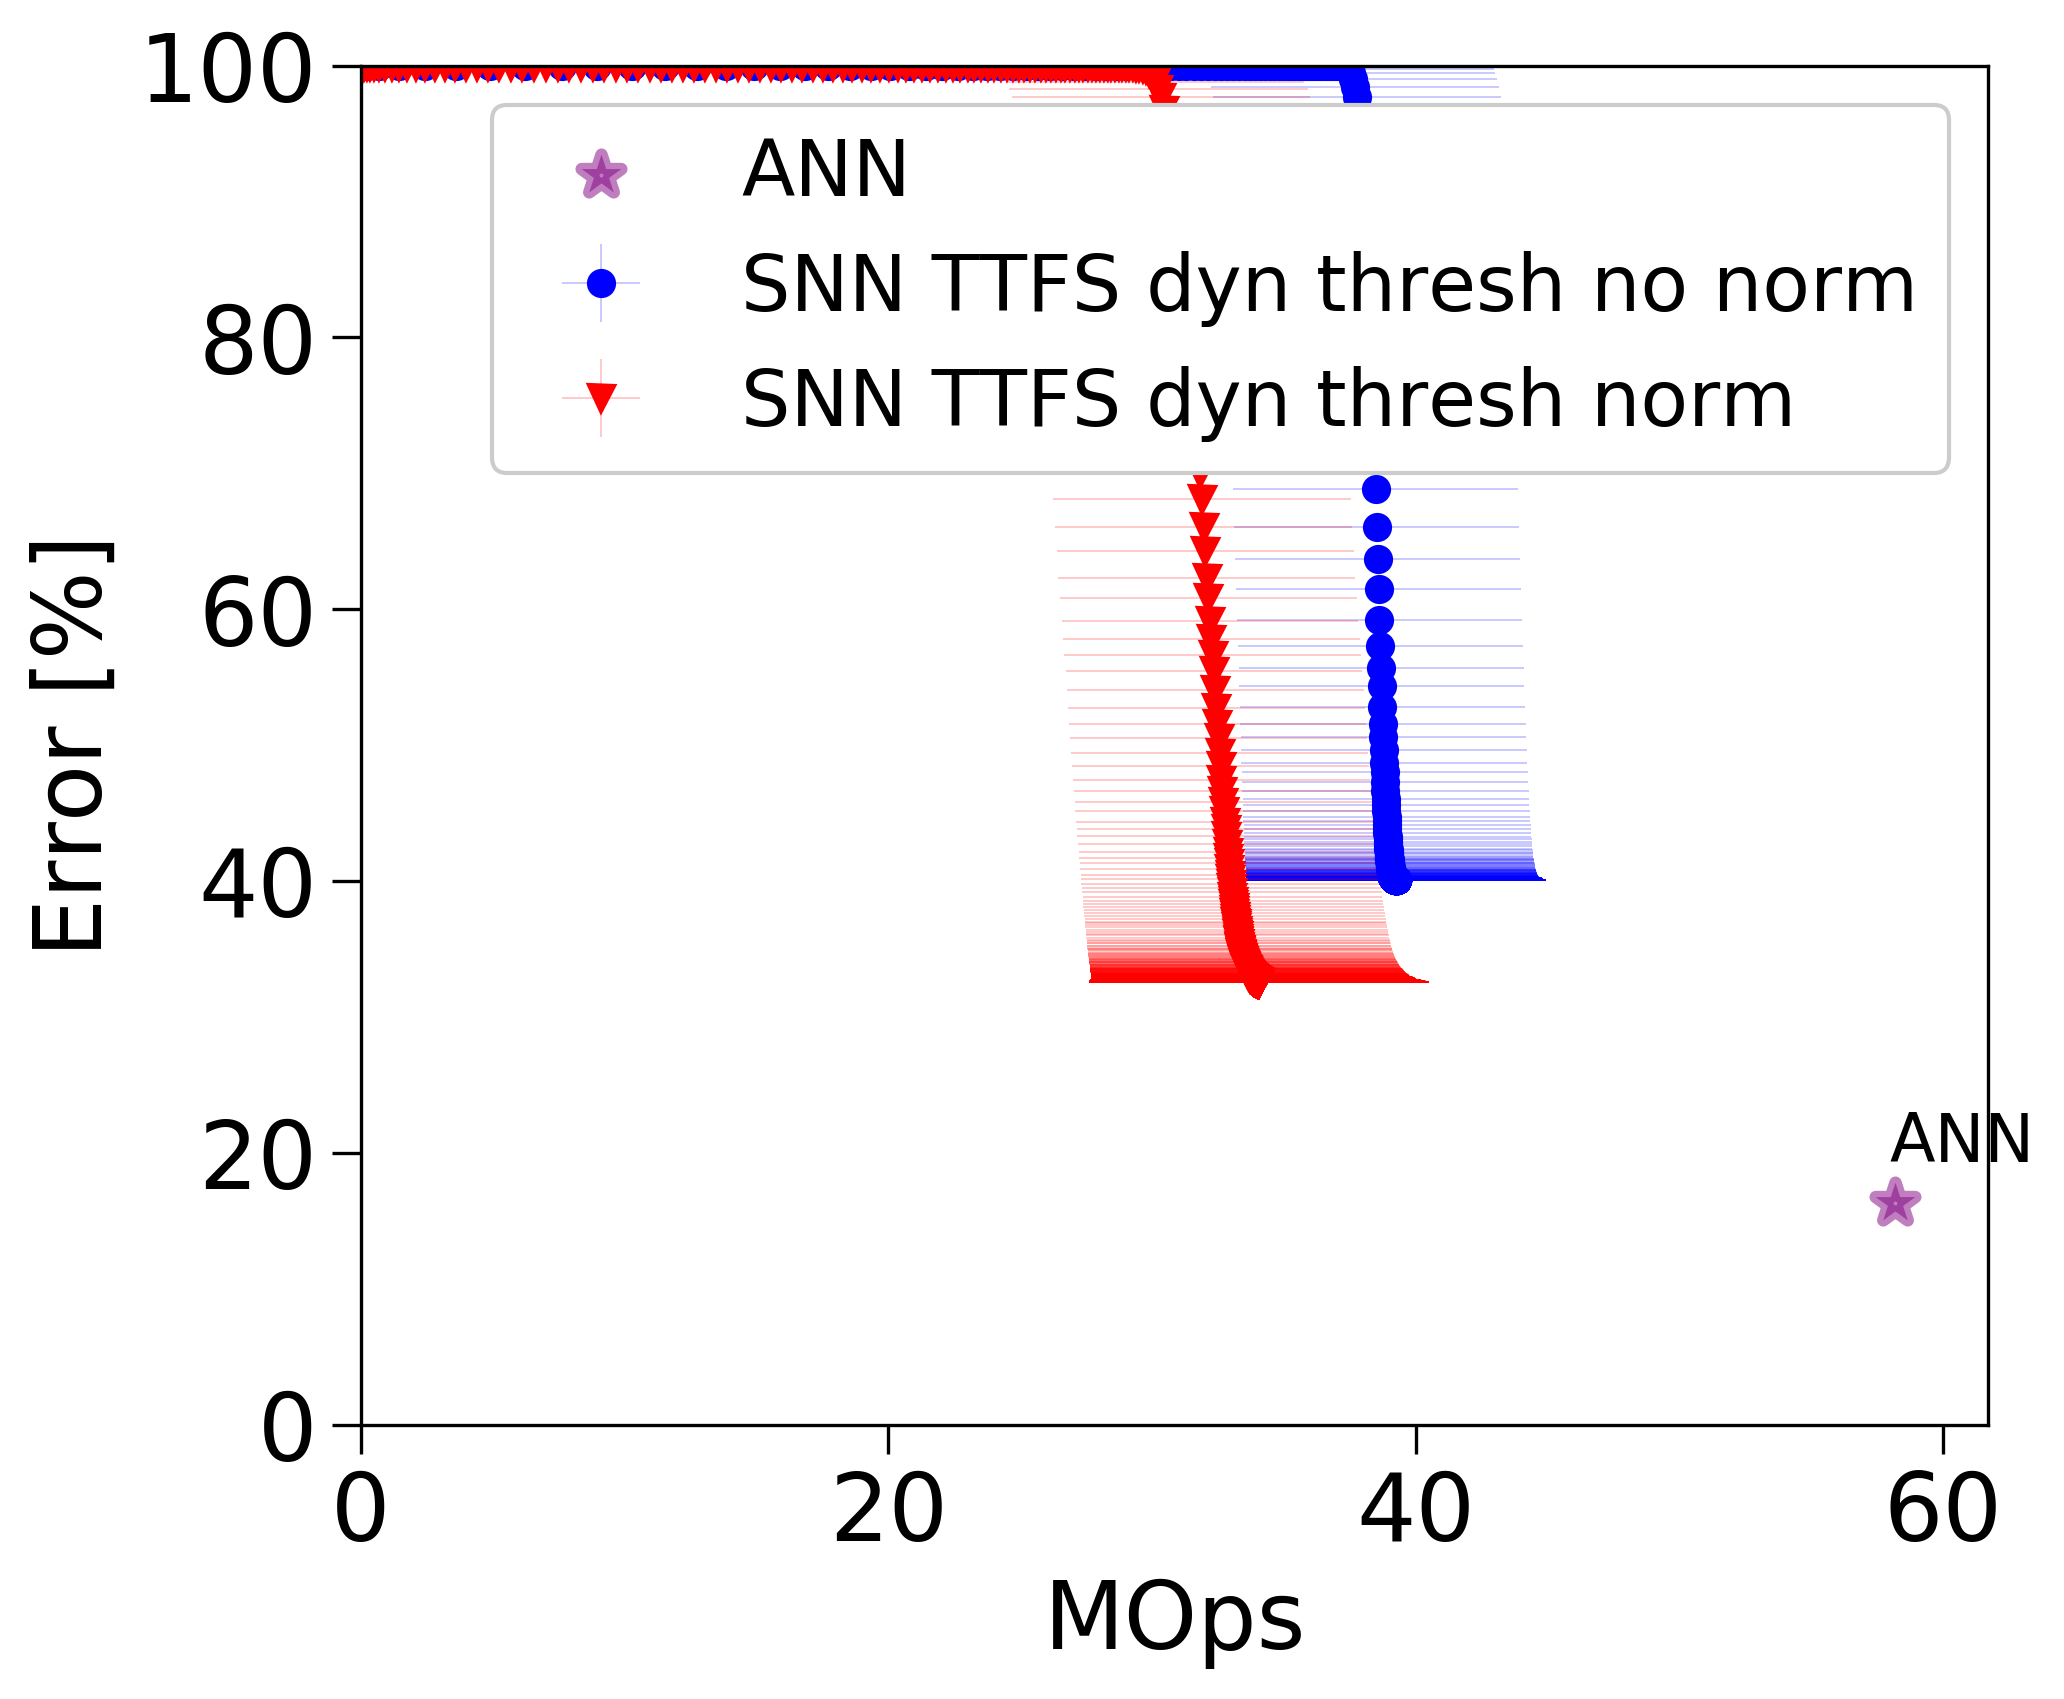

In [6]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, InsetPosition, mark_inset

show_numbers = False

fig, ax = plt.subplots()

for exp in experiments:
    ax.errorbar(exp.mean_computations_t, exp.e1_mean, xerr=exp.std_computations_t,
                yerr=exp.e1_confidence95, fmt=exp.marker, label='SNN '+exp.label, capsize=0, elinewidth=0.1, color=exp.color1)

exp = experiments[0]
ax.scatter(exp.operations_ann, exp.e1_ann, marker='*', s=100, label='ANN', color='purple', alpha=0.5, linewidths=3)
ax.annotate('ANN', xy=(exp.operations_ann - 0.2, exp.e1_ann + 3), fontsize=16)

if show_numbers:
    plt.annotate('({:.2f} MOps, {:.2f}%)'.format(exp.operations_ann, exp.e1_ann), xy=(exp.operations_ann - 0.8, exp.e1_ann + 7), fontsize=16, color=exp.color1)
    plt.annotate('({:.2f} MOps, {:.2f}%)'.format(exp.op1_0, exp.e1_0), xy=(exp.op1_0, exp.e1_0),
                 xytext=(exp.op1_0, exp.e1_0 + 13), fontsize=16,
                 arrowprops=dict(color=exp.color1, shrink=0.05, width=5, headwidth=10), color=exp.color1)

ax.set_xlim(0, None)
ax.set_ylim(0, 100)
ax.set_xlabel('MOps')
ax.set_ylabel('Error [%]')
leg = ax.legend(loc='upper right')
leg.get_frame().set_alpha(1)
# plt.title('ANN vs SNN performance')
fig.savefig(os.path.join(log_dir, 'err_vs_ops_mnist'), bbox_inches='tight')

In [7]:
for exp in experiments:
    print(exp.label)
    print('ANN top-1:                         ({:.5f} MOps/frame, {:.2f} %)'.format(exp.operations_ann, exp.e1_ann))
    print('SNN top-1 best error:         ({:.5f} MOps/frame, {:.2f} %)'.format(exp.op1_0, exp.e1_0))
    print('')

TTFS dyn thresh no norm
ANN top-1:                         (58.17297 MOps/frame, 16.33 %)
SNN top-1 best error:         (39.26402 MOps/frame, 40.06 %)

TTFS dyn thresh norm
ANN top-1:                         (58.17297 MOps/frame, 16.33 %)
SNN top-1 best error:         (34.05293 MOps/frame, 32.55 %)

